## Importing General Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

## Importing special purpose libraries

In [2]:
from tensorflow.keras.models import load_model
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils

### Loading the MNIST dataset

In [3]:
(train_X,train_y),(test_X,test_y) = mnist.load_data()
train_X.shape

(60000, 28, 28)

In [4]:
#reshaping to adjust according to our input layer
train_X = train_X.reshape(-1,28,28,1)
test_X  = test_X.reshape(-1,28,28,1)

train_X = train_X.astype('float32')
test_X  = test_X.astype('float32')

#normalizing all the input
train_X = train_X/255
test_X  = test_X/255

#One hot encoding
train_y = np_utils.to_categorical(train_y)
test_y  = np_utils.to_categorical(test_y)

## Defining our Model

In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(28,28,1), padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(0.01), metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [6]:
batch_size=40
epochs=20

plotting_data = model.fit(train_X,
                          train_y,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(test_X,test_y))

loss,accuracy = model.evaluate(test_X,test_y,verbose=0)

print('Test loss ---> ',str(round(loss*100,2)) +str('%'))
print('Test accuracy ---> ',str(round(accuracy*100,2)) +str('%'))

Epoch 1/20
1500/1500 [==============================] - 27s 17ms/step - loss: 0.8399 - accuracy: 0.7268 - val_loss: 0.2004 - val_accuracy: 0.9420
Epoch 2/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2759 - accuracy: 0.9171 - val_loss: 0.1237 - val_accuracy: 0.9633
Epoch 3/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1989 - accuracy: 0.9401 - val_loss: 0.0945 - val_accuracy: 0.9711
Epoch 4/20
1500/1500 [==============================] - 28s 19ms/step - loss: 0.1651 - accuracy: 0.9504 - val_loss: 0.0790 - val_accuracy: 0.9739
Epoch 5/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1438 - accuracy: 0.9577 - val_loss: 0.0656 - val_accuracy: 0.9779
Epoch 6/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1305 - accuracy: 0.9613 - val_loss: 0.0595 - val_accuracy: 0.9800
Epoch 7/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1185 - accuracy: 0.9640 - val_loss: 0.0557 -

In [7]:
model.save('Models/MINST_20_BS40_epochs.h5')

In [8]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 1s 5ms/step - loss: 0.0324 - accuracy: 0.9894


[0.03242284059524536, 0.9894000291824341]

In [9]:
Y_pred = model.predict(test_X)

313/313 [==============================] - 1s 4ms/step


# Generating and Visualizing results

In [10]:
Y_pred_label = np.argmax(Y_pred, axis=1)
cm = tf.math.confusion_matrix(labels = np.argmax(test_y, axis=1), predictions = Y_pred_label)

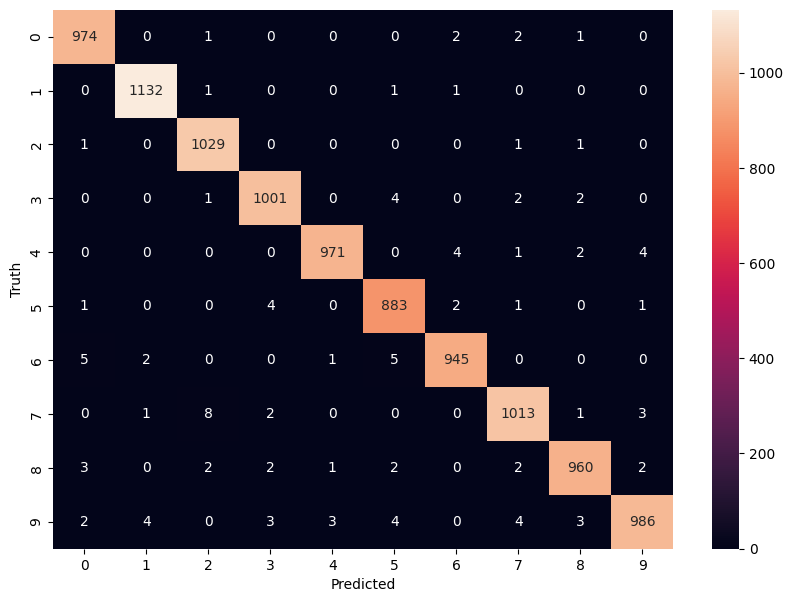

In [11]:
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.savefig('Graphs/ConfusionMatrix1.png')

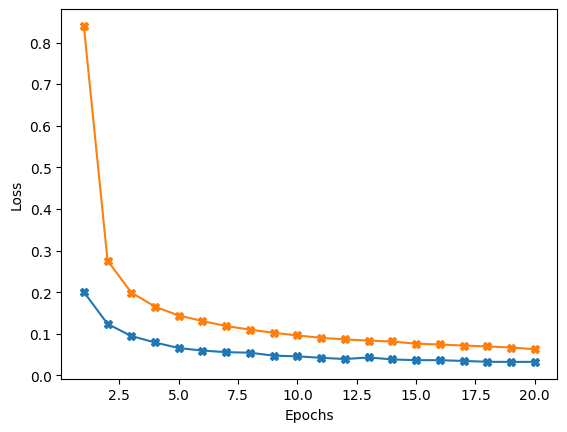

In [21]:
plotting_data_dict = plotting_data.history
epochs = range(1,len(test_loss)+1)

test_accuracy = plotting_data_dict['val_accuracy']
training_accuracy = plotting_data_dict['accuracy']

test_loss = plotting_data_dict['val_loss']
training_loss = plotting_data_dict['loss']

plt.plot(epochs,test_loss,marker='X',label='test_loss')
plt.plot(epochs,training_loss,marker='X',label='training_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.savefig('Graphs/loss1.png')

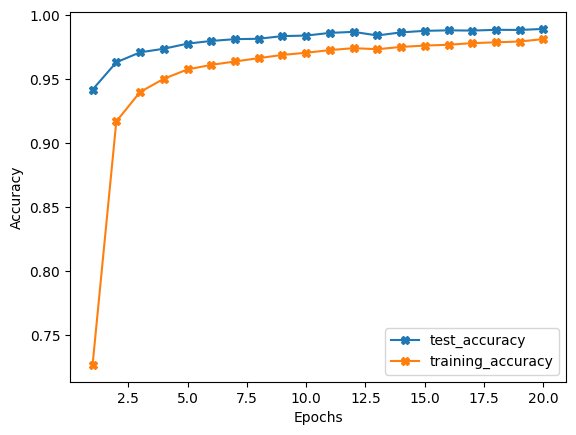

In [22]:
plt.plot(epochs, test_accuracy,marker='X',label='test_accuracy')
plt.plot(epochs, training_accuracy,marker='X',label='training_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig('Graphs/Accuracy1.png')